In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd 
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

In [3]:
def freedman_diaconis_binwidth(x: pd.Series) -> float:
    """Find optimal binwidth using Freedman-Diaconis rule."""
    IQR=x.quantile(0.75)-x.quantile(0.25)
    N=x.size

    return 2*IQR/N**(1/3)

In [4]:
%matplotlib inline
sns.set_style(style = 'whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
  'Adelie': '#ff6602ff',
  'Gentoo': '#0f715ff',
  'Chinstrap': '#c65dc9ff'
}

In [5]:
preprocess_penguins_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
preprocess_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [6]:
preprocess_penguins_df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [7]:
preprocess_penguins_df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [8]:
process_penguins_df = (
    preprocess_penguins_df
    .dropna()
)
process_penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [9]:
process_penguins_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


In [10]:
process_penguins_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [11]:
(
    preprocess_penguins_df
    .astype(
      {
        'species': 'category',
        'island': 'category',
        'sex': 'category'
      }
    ).describe(include='category')
)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


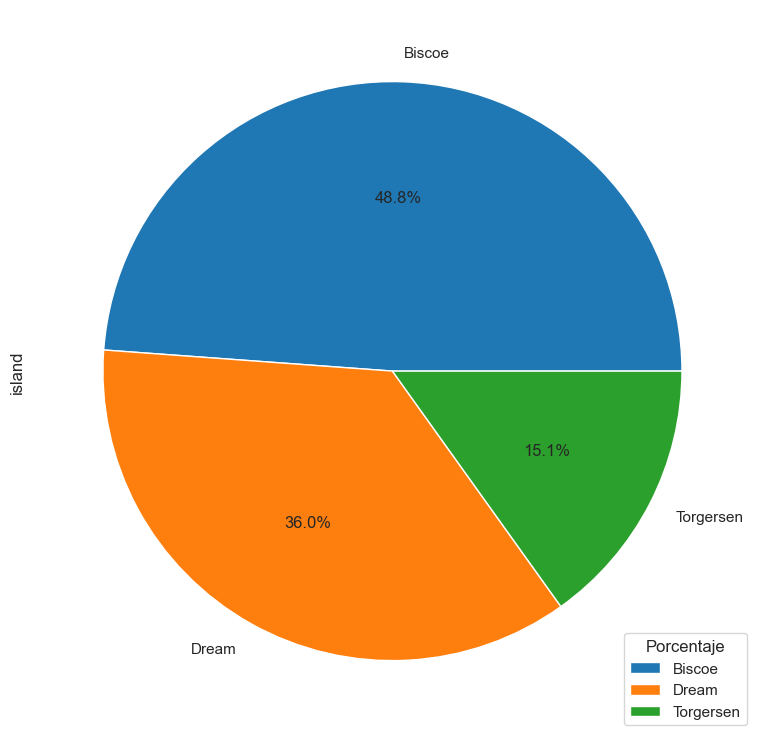

In [12]:
(
    preprocess_penguins_df
    .island
    .value_counts()
    .plot (
      kind='pie',
      autopct='%1.1f%%'
    )
)

plt.legend(title='Porcentaje')
plt.show()

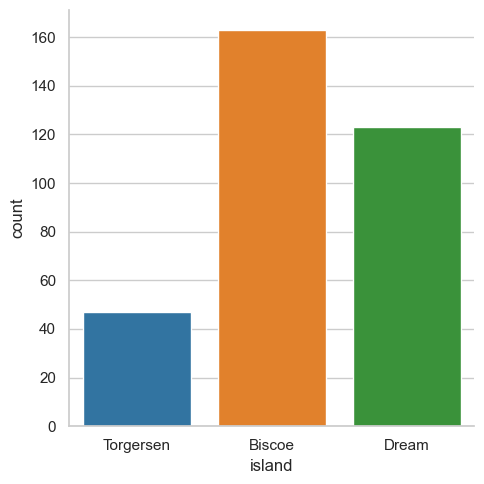

In [13]:
sns.catplot(
    data = process_penguins_df,
    x='island',
    kind='count',
)

<AxesSubplot: xlabel='island', ylabel='count'>

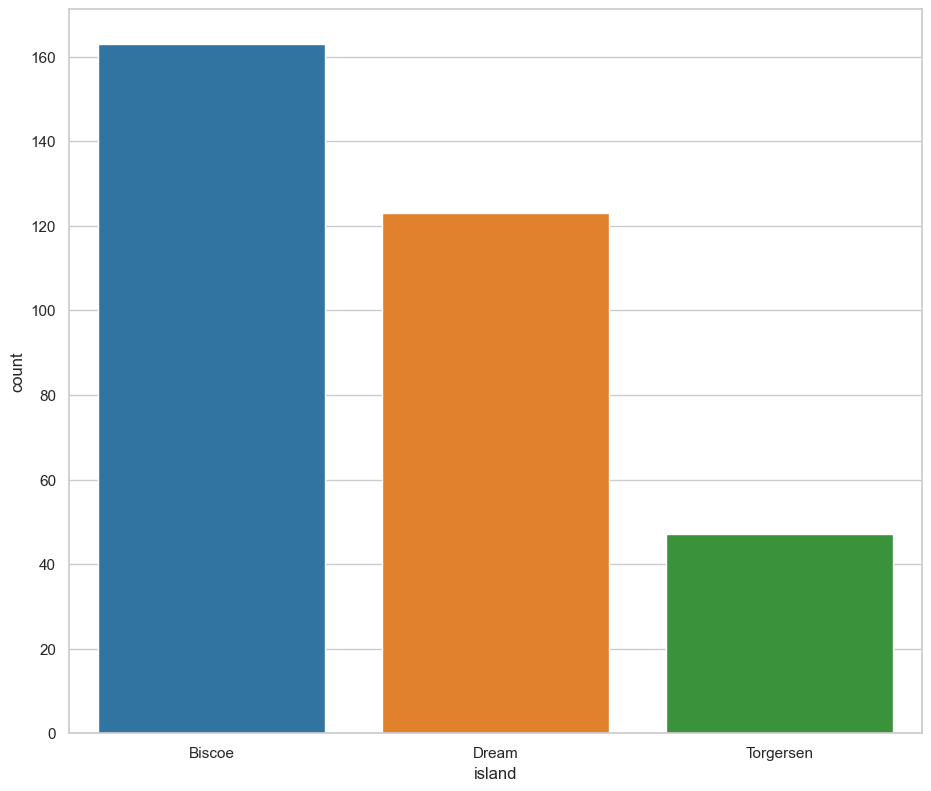

In [14]:
(
    process_penguins_df
    .value_counts('island', sort=True)
    .reset_index(name='count')
    .pipe(
      lambda df: (
        sns.barplot(
          data=df,
          x='island',
          y='count'
        )
      )
    )

)

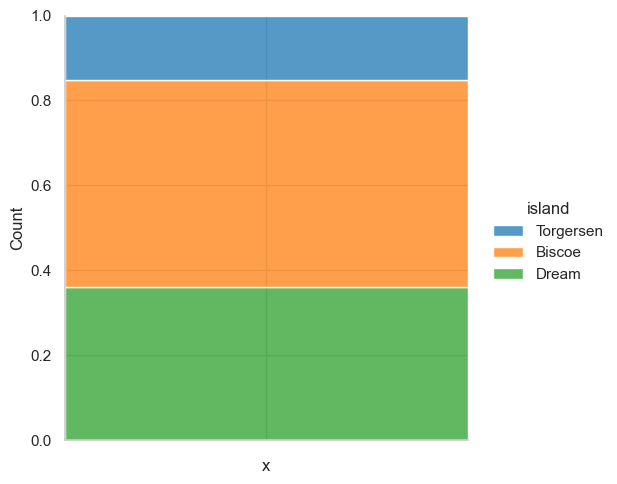

In [15]:
(
    preprocess_penguins_df
    .add_column('x', '')
    .pipe(
      lambda df: (
        sns.displot(
          data=df,
          x='x',
          hue='island',
          multiple='fill'
        )
      )
    )
)

In [16]:
penguin_body_mass_g=process_penguins_df.body_mass_g
penguin_body_mass_g

0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
339    4000.0
340    3400.0
341    3775.0
342    4100.0
343    3775.0
Name: body_mass_g, Length: 333, dtype: float64

<AxesSubplot: xlabel='body_mass_g', ylabel='Count'>

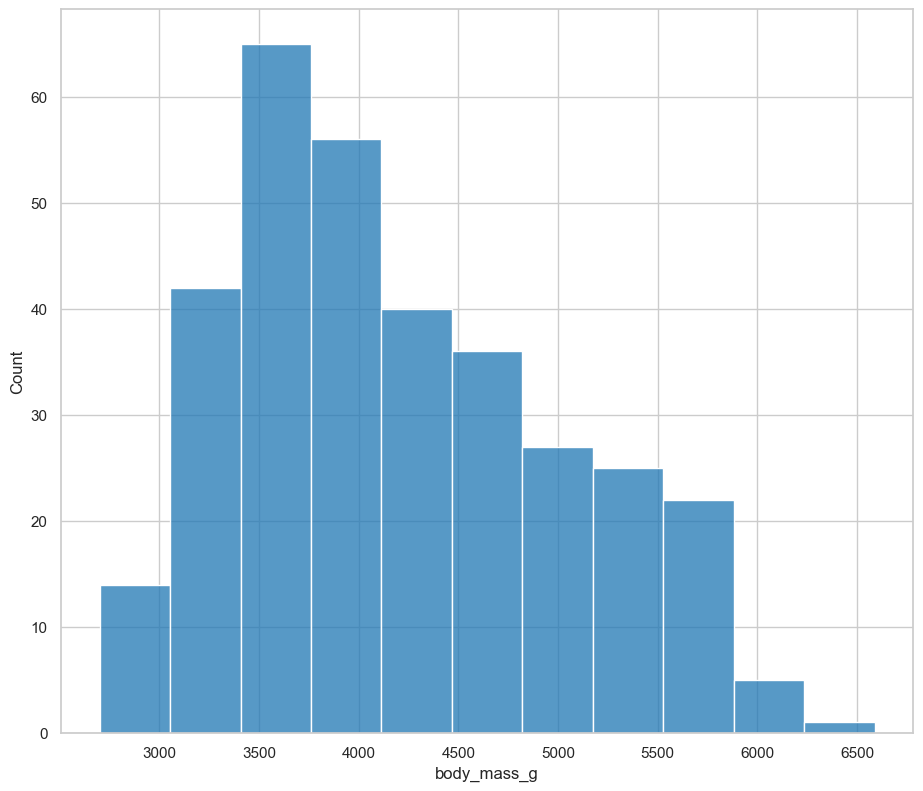

In [17]:
sns.histplot(
    data=process_penguins_df,
    x='body_mass_g',
    binwidth=freedman_diaconis_binwidth(process_penguins_df.body_mass_g)
)

<AxesSubplot: xlabel='island', ylabel='body_mass_g'>

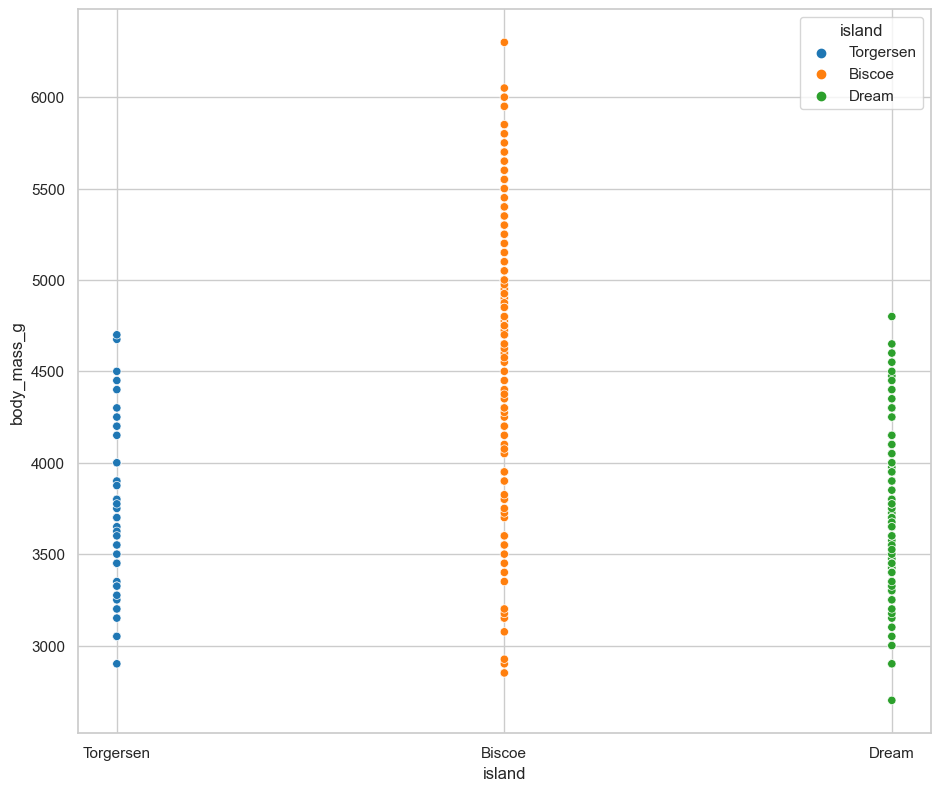

In [21]:
sns.scatterplot(
    data=process_penguins_df,
    x='island',
    y='body_mass_g',
    hue='island'
)

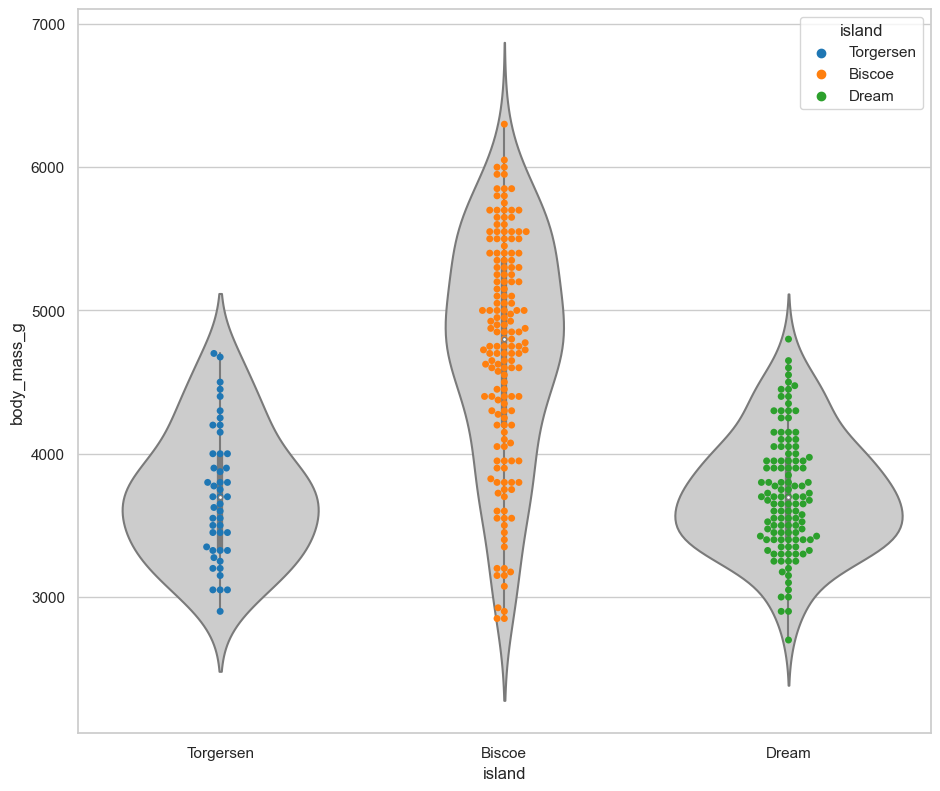

In [27]:
ax = sns.swarmplot(
    data=process_penguins_df,
    x='island',
    y='body_mass_g',
    hue='island'
)

ax = sns.violinplot(
    data=process_penguins_df,
    x='island',
    y='body_mass_g',
    color='.8'
)